In [ ]:
#path='D:/PhD/Course Work/AI and DL Lectures/images'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
#base_dir='D:/PhD/Course Work/AI and DL Lectures/images'
base_dir='/content/drive/My Drive/FaceMask/images'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'No Mask')

validation_mask_dir=os.path.join(validation_dir,'Mask')
validation_nomask_dir=os.path.join(validation_dir,'No Mask')


In [ ]:
train_mask_fnames=os.listdir(train_mask_dir)
train_nomask_fnames=os.listdir(train_nomask_dir)

print(train_mask_fnames[:10])
print(train_nomask_fnames[:10])

['maksssksksss106.png', 'maksssksksss11.png', 'maksssksksss127.png', 'maksssksksss13.png', 'maksssksksss112.png', 'maksssksksss102.png', 'maksssksksss117.png', 'maksssksksss133.png', 'maksssksksss111.png', 'maksssksksss122.png']
['maksssksksss114.png', 'maksssksksss121.png', 'maksssksksss128.png', 'maksssksksss129.png', 'maksssksksss125.png', 'maksssksksss137.png', 'maksssksksss176.png', 'maksssksksss172.png', 'maksssksksss153.png', 'maksssksksss181.png']


In [ ]:
print('total training mask image: ',len(os.listdir(train_mask_dir)))
print('total training no mask image: ',len(os.listdir(train_nomask_dir)))

print('total validation mask image: ',len(os.listdir(validation_mask_dir)))
print('total validation no mask image: ',len(os.listdir(validation_nomask_dir)))

total training mask image:  504
total training no mask image:  70
total validation mask image:  248
total validation no mask image:  22


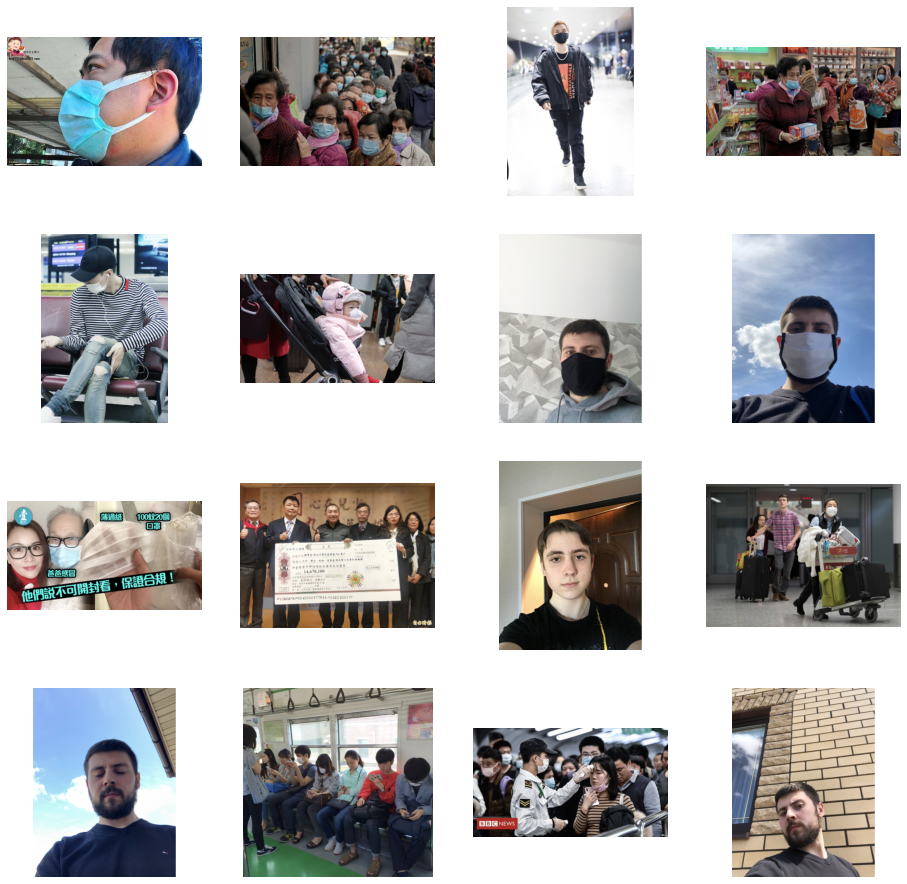

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# visualize
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

#pic_index+=8

next_mask_pix = [os.path.join(train_mask_dir, fname) 
                for fname in train_mask_fnames[ pic_index:pic_index+8] 
               ]

next_nomask_pix = [os.path.join(train_nomask_dir, fname) 
                for fname in train_nomask_fnames[ pic_index:pic_index+8]
               ]

for i, img_path in enumerate(next_mask_pix+next_nomask_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('mask') and 1 for the other ('no mask')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=0.001), 
             metrics=['acc'])



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 574 images belonging to 2 classes.
Found 270 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=574//50,
                              epochs=15,
                              validation_steps=270//50,
                              verbose=2)

Epoch 1/15
11/11 - 80s - loss: 0.8581 - acc: 0.8785 - val_loss: 0.3485 - val_acc: 0.9000
Epoch 2/15
11/11 - 44s - loss: 0.3390 - acc: 0.8879 - val_loss: 0.2393 - val_acc: 0.9400
Epoch 3/15
11/11 - 33s - loss: 0.3947 - acc: 0.8551 - val_loss: 0.2930 - val_acc: 0.9100
Epoch 4/15
11/11 - 21s - loss: 0.4507 - acc: 0.8455 - val_loss: 0.3167 - val_acc: 0.9000
Epoch 5/15
11/11 - 16s - loss: 0.3699 - acc: 0.8773 - val_loss: 0.3053 - val_acc: 0.9100
Epoch 6/15
11/11 - 12s - loss: 0.3482 - acc: 0.8727 - val_loss: 0.3325 - val_acc: 0.9100
Epoch 7/15
11/11 - 14s - loss: 0.3501 - acc: 0.8727 - val_loss: 0.2005 - val_acc: 0.9300
Epoch 8/15
11/11 - 11s - loss: 0.2761 - acc: 0.8955 - val_loss: 0.3274 - val_acc: 0.9100
Epoch 9/15
11/11 - 10s - loss: 0.2445 - acc: 0.8955 - val_loss: 0.2503 - val_acc: 0.9400
Epoch 10/15
11/11 - 10s - loss: 0.3061 - acc: 0.8955 - val_loss: 0.3090 - val_acc: 0.9300
Epoch 11/15
11/11 - 10s - loss: 0.2632 - acc: 0.9136 - val_loss: 0.2462 - val_acc: 0.9200
Epoch 12/15
11/11 -

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " has no mask")
    
  else:
    print(fn + " has a mask")
 

Saving maksssksksss48.png to maksssksksss48.png
[1.]
maksssksksss48.png has no mask
